# Testing
### Median-Einkommen steuerpflichtiger natürlicher Personen nach Jahr, Steuertarif und Stadtquartier.


Datum: 03.02.2022

**Importiere die notwendigen Packages**

In [1]:
#%pip install geopandas altair fiona requests folium mplleaflet contextily seaborn datetime plotly

In [2]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
#from datetime import datetime
import datetime
import geopandas as gpd
import folium 
import plotly.express as px
import seaborn as sns


Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [3]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_fd_median_einkommen_quartier_od1003

In [23]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/fd_median_einkommen_kreis_OD1007/WIR100OD1007.csv"

# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   parse_dates=['SteuerJahr'],
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )
print("done")

done


In der Folge ein paar erste Tests:

In [24]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [25]:
data2betested

,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerEinkommen_p50,SteuerEinkommen_p25,SteuerEinkommen_p75
0,1999-01-01,1,Kreis 1,0,Grundtarif,38,17,65
1,1999-01-01,1,Kreis 1,1,Verheiratetentarif,83,52,130
2,1999-01-01,1,Kreis 1,2,Einelternfamilientarif,47,26,87
3,1999-01-01,2,Kreis 2,0,Grundtarif,38,20,58
4,1999-01-01,2,Kreis 2,1,Verheiratetentarif,70,49,101
...,...,...,...,...,...,...,...,...
751,2019-01-01,11,Kreis 11,1,Verheiratetentarif,76,50,113
752,2019-01-01,11,Kreis 11,2,Einelternfamilientarif,43,22,67
753,2019-01-01,12,Kreis 12,0,Grundtarif,34,14,52
754,2019-01-01,12,Kreis 12,1,Verheiratetentarif,63,40,89


In [26]:
data2betested.dtypes

SteuerJahr             datetime64[ns]
KreisSort                       int64
KreisLang                      object
SteuerTarifSort                 int64
SteuerTarifLang                object
SteuerEinkommen_p50           float64
SteuerEinkommen_p25           float64
SteuerEinkommen_p75           float64
dtype: object

In [27]:
data2betested.shape

(756, 8)

Beschreibe einzelne Attribute

In [28]:
data2betested.describe()

,KreisSort,SteuerTarifSort,SteuerEinkommen_p50,SteuerEinkommen_p25,SteuerEinkommen_p75
count,756,756,756,756,756
mean,6,1,56,32,88
std,3,1,23,17,39
min,1,0,28,7,42
25%,4,0,40,20,62
50%,6,1,48,25,76
75%,9,2,65,43,99
max,12,2,136,85,226


Wie viele Nullwerte gibt es im Datensatz?

In [29]:
data2betested.isnull().sum()

SteuerJahr             0
KreisSort              0
KreisLang              0
SteuerTarifSort        0
SteuerTarifLang        0
SteuerEinkommen_p50    0
SteuerEinkommen_p25    0
SteuerEinkommen_p75    0
dtype: int64

In [30]:
check = data2betested.query('SteuerEinkommen_p50.isnull() and SteuerTarifLang != "Einelternfamilientarif"')
check

,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerEinkommen_p50,SteuerEinkommen_p25,SteuerEinkommen_p75


Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [31]:
data2betested['SteuerJahr']=pd.to_datetime(data2betested['SteuerJahr'], format='%Y')
data2betested

,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerEinkommen_p50,SteuerEinkommen_p25,SteuerEinkommen_p75
0,1999-01-01,1,Kreis 1,0,Grundtarif,38,17,65
1,1999-01-01,1,Kreis 1,1,Verheiratetentarif,83,52,130
2,1999-01-01,1,Kreis 1,2,Einelternfamilientarif,47,26,87
3,1999-01-01,2,Kreis 2,0,Grundtarif,38,20,58
4,1999-01-01,2,Kreis 2,1,Verheiratetentarif,70,49,101
...,...,...,...,...,...,...,...,...
751,2019-01-01,11,Kreis 11,1,Verheiratetentarif,76,50,113
752,2019-01-01,11,Kreis 11,2,Einelternfamilientarif,43,22,67
753,2019-01-01,12,Kreis 12,0,Grundtarif,34,14,52
754,2019-01-01,12,Kreis 12,1,Verheiratetentarif,63,40,89


Bereite die Daten für die Grafik unten vor

In [32]:
Jahre = data2betested.groupby("SteuerJahr")
len(Jahre)

21

In [33]:
for key, group in Jahre:
    print(key, len(group))

1999-01-01 00:00:00 36
2000-01-01 00:00:00 36
2001-01-01 00:00:00 36
2002-01-01 00:00:00 36
2003-01-01 00:00:00 36
2004-01-01 00:00:00 36
2005-01-01 00:00:00 36
2006-01-01 00:00:00 36
2007-01-01 00:00:00 36
2008-01-01 00:00:00 36
2009-01-01 00:00:00 36
2010-01-01 00:00:00 36
2011-01-01 00:00:00 36
2012-01-01 00:00:00 36
2013-01-01 00:00:00 36
2014-01-01 00:00:00 36
2015-01-01 00:00:00 36
2016-01-01 00:00:00 36
2017-01-01 00:00:00 36
2018-01-01 00:00:00 36
2019-01-01 00:00:00 36


In [34]:
myJahr = "2019-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr

,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerEinkommen_p50,SteuerEinkommen_p25,SteuerEinkommen_p75
720,2019-01-01,1,Kreis 1,0,Grundtarif,44,14,80
721,2019-01-01,1,Kreis 1,1,Verheiratetentarif,116,67,197
722,2019-01-01,1,Kreis 1,2,Einelternfamilientarif,61,31,97
723,2019-01-01,2,Kreis 2,0,Grundtarif,46,20,73
724,2019-01-01,2,Kreis 2,1,Verheiratetentarif,96,61,153
725,2019-01-01,2,Kreis 2,2,Einelternfamilientarif,53,30,82
726,2019-01-01,3,Kreis 3,0,Grundtarif,45,21,69
727,2019-01-01,3,Kreis 3,1,Verheiratetentarif,77,48,121
728,2019-01-01,3,Kreis 3,2,Einelternfamilientarif,47,28,76
729,2019-01-01,4,Kreis 4,0,Grundtarif,42,19,67


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [35]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [36]:
mySelection = data2betested[(data2betested.KreisSort >1) & (data2betested.SteuerJahr == "2019")] #data2betested.SteuerTarifLang=="Grundtarif") & 

mySelection.head()


,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerEinkommen_p50,SteuerEinkommen_p25,SteuerEinkommen_p75
723,2019-01-01,2,Kreis 2,0,Grundtarif,46,20,73
724,2019-01-01,2,Kreis 2,1,Verheiratetentarif,96,61,153
725,2019-01-01,2,Kreis 2,2,Einelternfamilientarif,53,30,82
726,2019-01-01,3,Kreis 3,0,Grundtarif,45,21,69
727,2019-01-01,3,Kreis 3,1,Verheiratetentarif,77,48,121


In [37]:
myGraph = mySelection
myGraph.head()


,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerEinkommen_p50,SteuerEinkommen_p25,SteuerEinkommen_p75
723,2019-01-01,2,Kreis 2,0,Grundtarif,46,20,73
724,2019-01-01,2,Kreis 2,1,Verheiratetentarif,96,61,153
725,2019-01-01,2,Kreis 2,2,Einelternfamilientarif,53,30,82
726,2019-01-01,3,Kreis 3,0,Grundtarif,45,21,69
727,2019-01-01,3,Kreis 3,1,Verheiratetentarif,77,48,121


In [47]:
myTitle="Medianeinkommen nach Stadtkreis, 2019"

highlight = alt.selection(type='single', on='mouseover',
                          fields=['SteuerTarifLang'], nearest=True)

base = alt.Chart(myGraph,title=myTitle ).encode(
    x=alt.X('KreisLang', axis=alt.Axis(title='Stadtkreis'))
    ,y=alt.X('SteuerEinkommen_p50', axis=alt.Axis(title='Medianeinkommen p50'))
    , color=alt.Color('SteuerTarifLang', legend=alt.Legend(title="Steuertarif:", orient="right"))  
    ,tooltip=['SteuerJahr', 'KreisLang','SteuerEinkommen_p50', 'SteuerTarifLang']       
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

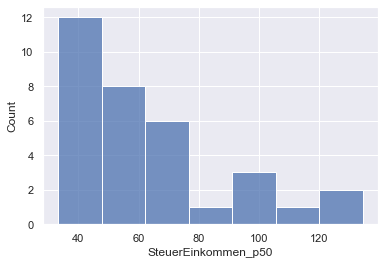

In [48]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=myGraph, x="SteuerEinkommen_p50") #, y="KonOGDKurz")
plt.show();

Test: Choroplethenkarte

### Choroplethenkarte
Importiere die Geodaten als GeoJSON

**Stadtkreise:**

In [49]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Stadtkreise?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_stadtkreise_v"
df_adm_stadtkreise_v = gpd.read_file(geojson_url)

df_adm_stadtkreise_v.head(5)


,id,kname,knr,objid,geometry
0,adm_stadtkreise_v.6,Kreis 7,7,6,"POLYGON ((8.54885 47.36602, 8.54901 47.36601, ..."
1,adm_stadtkreise_v.10,Kreis 11,11,10,"POLYGON ((8.55562 47.40129, 8.55543 47.40137, ..."
2,adm_stadtkreise_v.4,Kreis 9,9,4,"POLYGON ((8.50320 47.38100, 8.50308 47.38131, ..."
3,adm_stadtkreise_v.8,Kreis 2,2,8,"POLYGON ((8.52820 47.36885, 8.52901 47.36938, ..."
4,adm_stadtkreise_v.12,Kreis 10,10,12,"POLYGON ((8.50543 47.39495, 8.50532 47.39497, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [50]:
selectMapAttr1 = data2betested[(data2betested.SteuerTarifLang=="Grundtarif") & (data2betested.SteuerJahr == "2018")]
selectMapAttr2 = data2betested[(data2betested.SteuerTarifLang=="Verheiratetentarif") & (data2betested.SteuerJahr == "2018")]


In [51]:
selectMapAttr1.head(3)
#selectMapAttr1.info()

,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerEinkommen_p50,SteuerEinkommen_p25,SteuerEinkommen_p75
684,2018-01-01,1,Kreis 1,0,Grundtarif,46,16,85
687,2018-01-01,2,Kreis 2,0,Grundtarif,46,21,77
690,2018-01-01,3,Kreis 3,0,Grundtarif,45,21,70


In [52]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

df_adm_stadtkreise_v_rename = df_adm_stadtkreise_v[['geometry', 'knr', 'kname']].rename(columns={'kname': 'KreisLang'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
df_adm_stadtkreise_v_joined = df_adm_stadtkreise_v_rename.merge(selectMapAttr1, on='KreisLang')

print('done')


done


<AxesSubplot:>

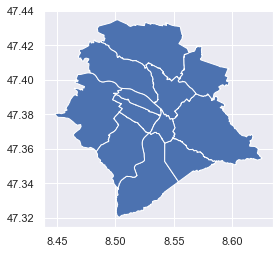

In [29]:
df_adm_stadtkreise_v_joined.plot()

<AxesSubplot:>

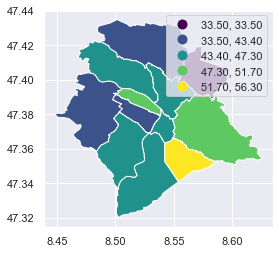

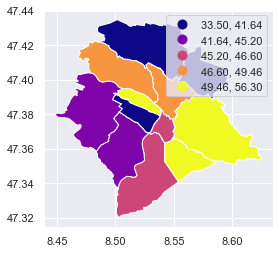

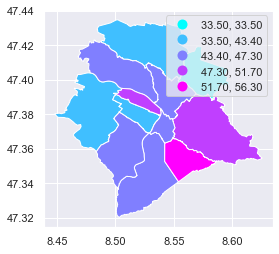

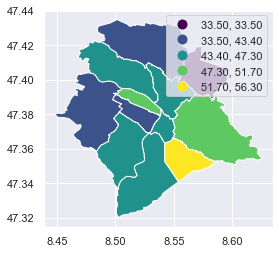

In [30]:
# Plot by StadtKreise

df_adm_stadtkreise_v_joined.plot(column='SteuerEinkommen_p50', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

df_adm_stadtkreise_v_joined.plot(column='SteuerEinkommen_p50', cmap='plasma', scheme='quantiles', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
df_adm_stadtkreise_v_joined.plot(column='SteuerEinkommen_p50', cmap='cool', scheme='fisherjenks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

df_adm_stadtkreise_v_joined.plot(column='SteuerEinkommen_p50', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

----------------------------------------------------------------------------------------

#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html